In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import skimage
import io
import torchvision
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from torch.utils.tensorboard import SummaryWriter

from PIL import Image


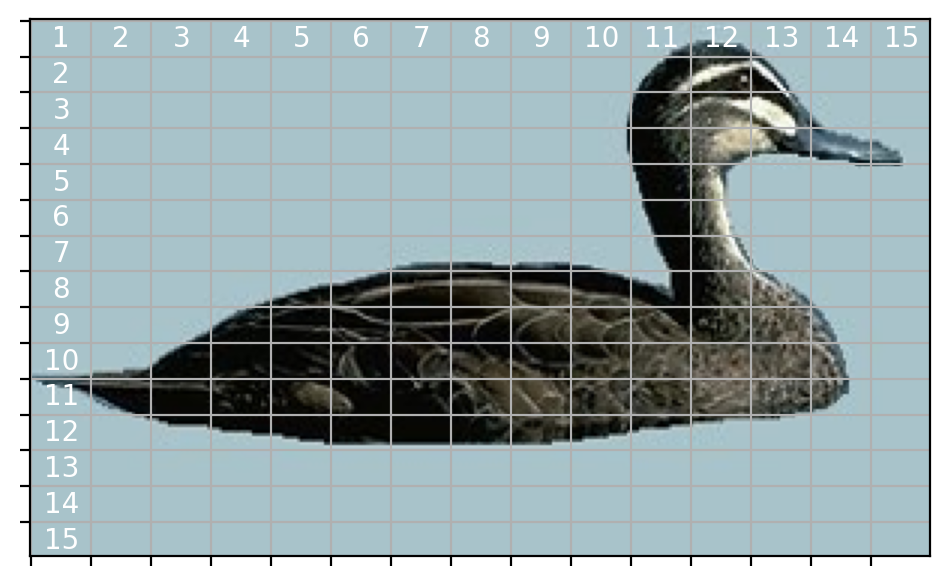

In [17]:

# Open image file
image = Image.open('datasets/PF-dataset/duck(S)/060_0000.png')
my_dpi=200
n_squares = 15

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi*3,float(image.size[1])/my_dpi*3),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)



# Set the gridding interval: here we use the major tick interval
x_interval = image.size[0]/n_squares
y_interval = image.size[1]/n_squares

loc_x = plticker.MultipleLocator(base=x_interval)
loc_y = plticker.MultipleLocator(base=y_interval)
ax.xaxis.set_major_locator(loc_x)
ax.yaxis.set_major_locator(loc_y)
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)

# Add some labels to the gridsquares

for i in range(n_squares):
    y = y_interval/2.
    x = x_interval/2.+float(i)*x_interval
    ax.text(x, y, '{:d}'.format(i+1), color='w', ha='center', va='center')

for i in range(n_squares):
    y = y_interval/2.+float(i)*y_interval
    x = x_interval/2.
    ax.text(x, y, '{:d}'.format(i+1), color='w', ha='center', va='center')

# Save the figure
fig.savefig('datasets/PF-dataset/duck(S)/060_0000_grid.png',dpi=my_dpi)

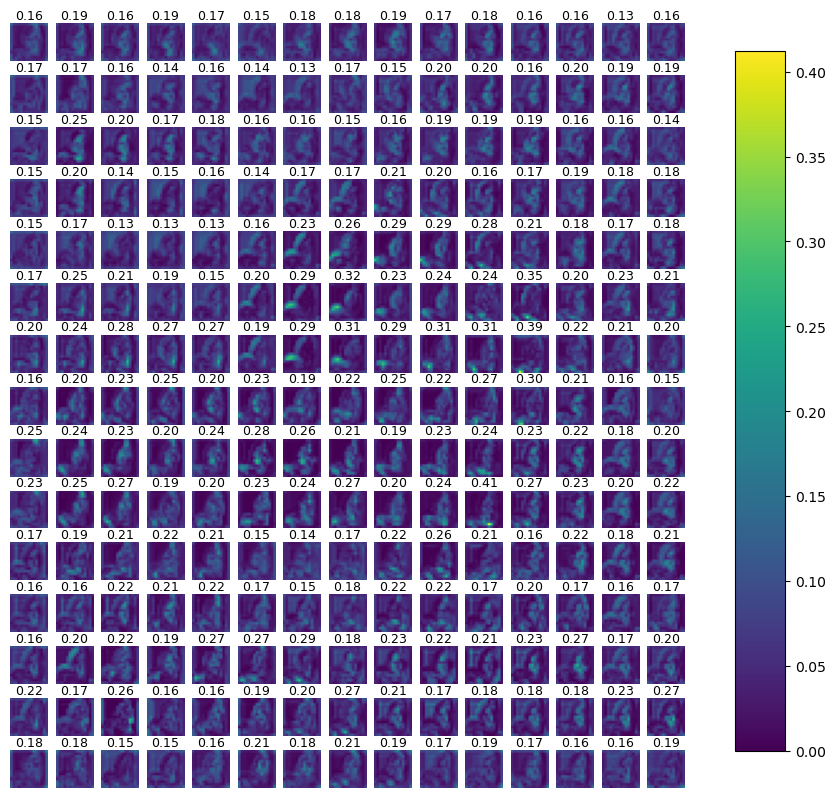

In [18]:
a = np.load("output_correlation_00-71.npy")

# Matching layer square size
s = 15

# Maximum dot product value used to scale values of all images from 0 to 1
max_a = a.max()
min_a = a.min()

fig, axs = plt.subplots(s, s, figsize=(10,10))

for i in range(s):
    for j in range(s):
        m_vect = a[0,:,i,j]
        im = axs[i,j].imshow(m_vect.reshape(15,15), vmin=min_a, vmax=max_a, cmap='viridis') #cividis

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

for i in range(s):
    for j in range(s):
        m_vect = a[0,:,i,j]
        im = axs[i,j].set_title('{:.2f}'.format(m_vect.max()), y=0.89, fontsize=9)
        im = axs[i,j].axis('off')

plt.savefig('output_correlation_00-71_grid.png', dpi = 300)
plt.show()